In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Exercise 1

In [2]:
A = np.array([[.3, .6, .1], [.5, .2, .3], [.4, .1, .5]])
v = np.array([1./3., 1./3., 1./3.])

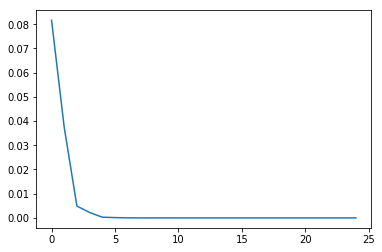

In [3]:
dist = []
for i in range(25):
    v_new = v.dot(A)
    dist.append(np.linalg.norm(v_new - v))
    v = v_new
plt.plot(dist)
plt.show()

### Exercise 2

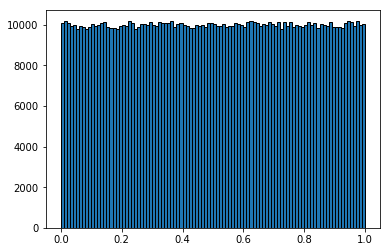

Mean of X: 0.5004001137894211
Variance of X: 0.08330163317717908


In [4]:
ex2_X = np.random.random(1000000)
plt.hist(ex2_X, bins=100, ec='black')
plt.show()
print('Mean of X:', np.mean(ex2_X))
print('Variance of X:', np.var(ex2_X))

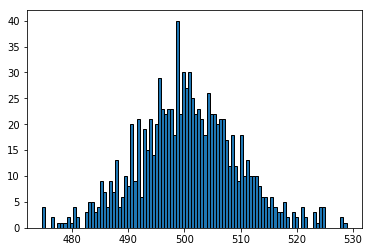

Expected mean of Y: 500.4001137894211
Expected variance of Y: 83.30163317717907
Mean of Y: 500.5526308568889
Variance of Y: 78.530982866684


In [5]:
ex2_Y = np.empty(1000) # Calculate 1000 values of Y
N = 1000 # Each Y is sum of 1000 values of X
for i in range(1000):
    ex2_Y[i] = sum(np.random.choice(ex2_X, N))
plt.hist(ex2_Y, bins=100, ec='black')
plt.show()
print('Expected mean of Y:', np.mean(ex2_X) * N)
print('Expected variance of Y:', np.var(ex2_X) * N)
print('Mean of Y:', np.mean(ex2_Y))
print('Variance of Y:', np.var(ex2_Y))

### Exercise 3

In [6]:
df = pd.read_csv('train.csv')

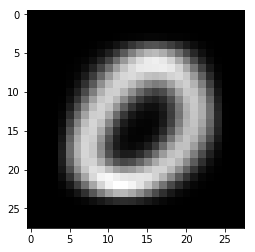

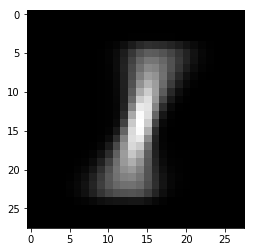

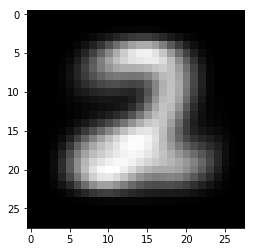

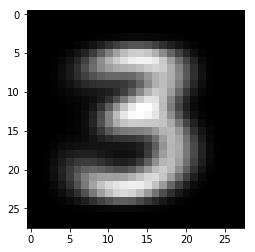

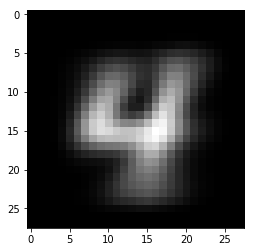

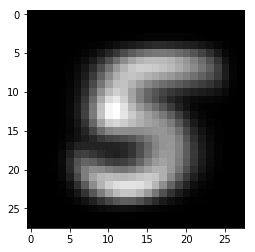

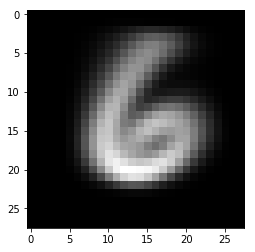

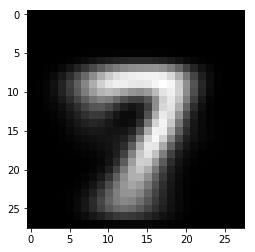

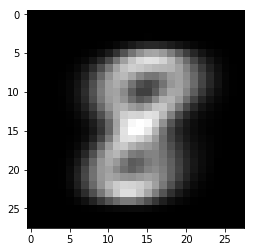

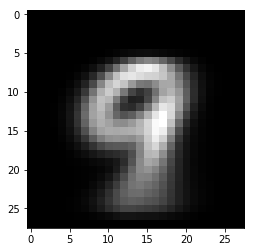

In [7]:
pics = []
for i in range(10):
    digit = df[df.label == i].as_matrix()[:, 1:]
    picture = np.sum(digit, axis=0) / float(digit.shape[0])
    pics.append(picture.reshape((28,28)))
for picture in pics:
    plt.imshow(picture, cmap='gray')
    plt.show()

### Exercise 4

In [8]:
import time
image = pics[2]

Time taken: 0.0002586841583251953


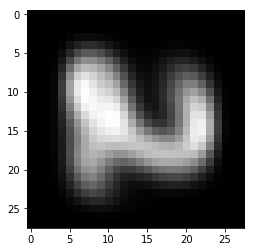

In [9]:
start = time.time()
rotated_image = np.rot90(image, 3)
print("Time taken: %s" % (time.time() - start))
plt.imshow(rotated_image, cmap='gray')
plt.show()

Time taken: 0.002521514892578125


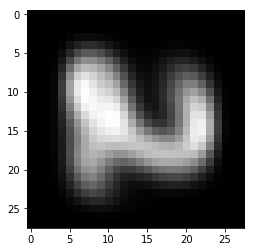

In [10]:
start = time.time()
rotated_image = np.zeros(image.shape)
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        rotated_image[i][j] = image[image.shape[0] - 1 - j][i]
print("Time taken: %s" % (time.time() - start))
plt.imshow(rotated_image, cmap='gray')
plt.show()

### Exercise 5

In [11]:
def is_symmetric_manual(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return False
    for i in range(matrix.shape[0]):
        for j in range(i, matrix.shape[1]):
            if matrix[i][j] != matrix[j][i]:
                return False
    return True

In [12]:
def is_symmetric_np(matrix):
    if matrix.shape[0] != matrix.shape[1]:
        return False
    return np.allclose(matrix, matrix.T)

In [13]:
mat1 = np.array([[1,2,3], [2,4,6]])
mat2 = np.array([[1,2,3], [2,4,6], [3,6,5]])
mat3 = np.array([[1,2,3], [2,4,3], [3,6,5]])
print("Mat1:\n", mat1)
print("Mat2:\n", mat2)
print("Mat3:\n", mat3)
print("\nUse for loops:")
start = time.time()
print("Mat1 is symmetric: %s" % (is_symmetric_manual(mat1)))
print("Mat2 is symmetric: %s" % (is_symmetric_manual(mat2)))
print("Mat3 is symmetric: %s" % (is_symmetric_manual(mat3)))
print("Time taken: %s" % (time.time() - start))

print("\nUse numpy functions:")
start = time.time()
print("Mat1 is symmetric: %s" % (is_symmetric_np(mat1)))
print("Mat2 is symmetric: %s" % (is_symmetric_np(mat2)))
print("Mat3 is symmetric: %s" % (is_symmetric_np(mat3)))
print("Time taken: %s" % (time.time() - start))

Mat1:
 [[1 2 3]
 [2 4 6]]
Mat2:
 [[1 2 3]
 [2 4 6]
 [3 6 5]]
Mat3:
 [[1 2 3]
 [2 4 3]
 [3 6 5]]

Use for loops:
Mat1 is symmetric: False
Mat2 is symmetric: True
Mat3 is symmetric: False
Time taken: 0.0005168914794921875

Use numpy functions:
Mat1 is symmetric: False
Mat2 is symmetric: True
Mat3 is symmetric: False
Time taken: 0.0007174015045166016


### Exercise 6

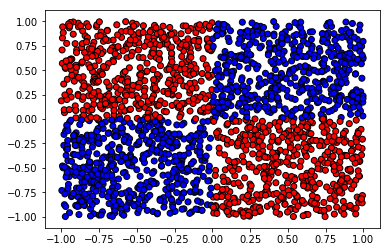

In [14]:
ex6_X = np.random.uniform(-1, 1, (2000, 2))
color = np.where(np.logical_xor(ex6_X[:, 0] > 0, ex6_X[:, 1] > 0), 'red', 'blue')
plt.scatter(ex6_X[:, 0], ex6_X[:, 1], edgecolor='black', c=color)
plt.show()

### Exercise 7

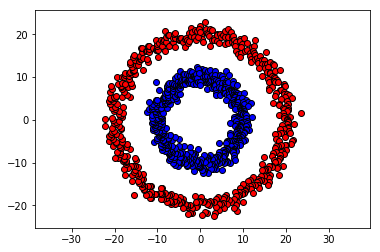

In [15]:
def dist(R):
    r = np.random.normal(R, 1.2, 500)
    phi = np.linspace(0, 2.*np.pi, 500)
    return r * np.sin(phi), r * np.cos(phi)

ex7_x1, ex7_y1 = dist(10)
plt.scatter(ex7_x1, ex7_y1, color='blue', edgecolor='black')

ex7_x2, ex7_y2 = dist(20)
plt.scatter(ex7_x2, ex7_y2, color='red', edgecolor='black')

plt.axis('equal')
plt.show()

### Exercise 8

[]

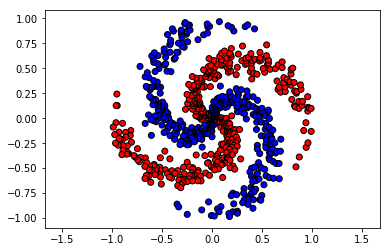

In [16]:
N = 200
n_classes = 4
delta = 2*np.pi / n_classes
ex8_X = np.array([])
ex8_Y = np.array([])
label = np.array([])
for j in range(n_classes):
    r = np.linspace(0, 1, N)
    t = np.linspace((j-1)*np.pi + delta*j, j*np.pi + delta*j, N) + np.random.normal(scale=0.25, size=N)
#     t = np.linspace((j-1)*np.pi, j*np.pi, N) + np.random.normal(scale=0.3, size=N)
    Xtemp = r*np.sin(t)
    Ytemp = r*np.cos(t)
    ex8_X = np.append(ex8_X, Xtemp)
    ex8_Y = np.append(ex8_Y, Ytemp)
    if j%2 == 0:
        label = np.append(label, np.zeros(N))
    else:
        label = np.append(label, np.ones(N))

color = np.where(label == 1, 'red', 'blue')
plt.scatter(ex8_X, ex8_Y, c=color, edgecolor='black')
plt.axis('equal')
plt.plot()

### Exercise 9

In [17]:
def dist(R):
    r = np.random.normal(R, 1.2, 500)
    phi = np.linspace(0, 2.*np.pi, 500)
    return r * np.sin(phi), r * np.cos(phi)

ex9_x1, ex9_y1 = dist(10)
ex9_x2, ex9_y2 = dist(20)
ex9_X1 = np.append(ex9_x1, ex9_x2)
ex9_X2 = np.append(ex9_y1, ex9_y2)
ex9_Y = np.append(np.zeros(500), np.ones(500))
df = pd.DataFrame({'X1':ex9_X1, 'X2':ex9_X2, 'Y':ex9_Y})
df = df.sample(frac=1).reset_index(drop=True)
df.to_csv('donut.csv', index=False)
df.head(10)

,X1,X2,Y
0,7.972347,7.275868,0.0
1,9.129401,-5.848669,0.0
2,-0.872140,-9.207720,0.0
3,1.468408,19.399425,1.0
4,-11.761204,16.145118,1.0
5,11.571751,14.311403,1.0
6,-4.069135,-6.863755,0.0
7,-19.293358,-1.521476,1.0
8,10.872550,-3.884229,0.0
9,-0.122556,-19.466064,1.0
